In [0]:
#sklearn has two types of graph-based semi supervised learning models
# 1. label propagation: standard iterative label propagation
# 2. label spreading: similar to label propagation, but based on distance matrix of normalized graph laplacian and soft clamping


In [0]:
# lib prep
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation

# Load Data

In [0]:
def load_data():
  digits = datasets.load_digits()
  rng = np.random.RandomState(0)
  indices = np.arange(len(digits.data))
  # shuffling the data
  rng.shuffle(indices)
  X = digits.data[indices]
  y = digits.target[indices]
  # produce unlabled data
  n_labled_points = int(len(y)/10)
  unlabled_indices = np.arange(len(y))[n_labled_points:]
  return X,y,unlabled_indices

In [0]:
# class sklearn.semi_supervised.LabelSpreading()

## Params
# kernel: a string, 'rbf' or' knn' as the distance kernel. rbf needs heavy computation and the distance matrix is symmetric but knn uses less computation and sparse matrix where the distance matrix is non symmetric
# gamma: float, the parameter of rbf
# n_neighbors: integer of knn
# alpha: the trade off
# max_iter
# tol: float of convergence threshold
# 
## Attributes
# X_ : input array
# classes_: label array
# label_distribution_ : label distribution array
# transduction_: the predicted label of every sample
# n_iter_: the actuall iteration
# 
# # Methods
# fit(X,y)
# predict(X)
# predict_proba(X)
# score(X,y[,sample_weight])  

# Test label spreading

In [0]:
from sklearn.semi_supervised import LabelSpreading

def test_labelSpreading(*data):
  X,y, unlabled_indices = data
  y_train = np.copy(y)
  y_train[unlabled_indices]=-1
  clf = LabelSpreading(max_iter=100,kernel='rbf',gamma=.1)
  clf.fit(X,y_train)
  true_labels = y[unlabled_indices]
  print("Accuracy:%f"%clf.score(X[unlabled_indices],true_labels))

In [0]:
data=load_data()
test_labelSpreading(*data)

Accuracy:0.972806


# Test based on alpha and gamma and kernel rbf

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.

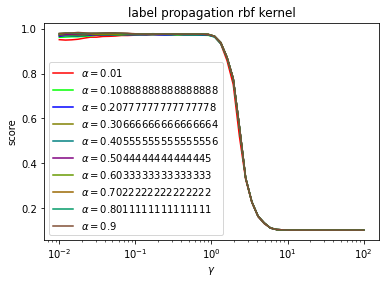

In [0]:
def test_labelSpreading_rbf(*data):
  X,y, unlabled_indices = data
  y_train = np.copy(y)
  y_train[unlabled_indices]=-1

  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  alphas = np.linspace(.01,0.9,num=10,endpoint=True)
  gammas = np.logspace(-2,2,num=50)
  colors = ((1,0,0),(0,1,0), (0,0,1), (.5,.5,0),(0,.5,.5),(.5,0,.5),(.4,.6,0),(.6,.4,0),(0,.6,.4),(.5,.3,.2),)

  for alpha, color in zip(alphas,colors):
    scores = []
    for gamma in gammas:
      clf = LabelSpreading(max_iter=100,gamma=gamma, alpha = alpha, kernel='rbf')
      clf.fit(X,y_train)
      scores.append(clf.score(X[unlabled_indices],y[unlabled_indices]))
    ax.plot(gammas,scores,label=r"$\alpha=%s$"%alpha, color=color)

  ax.set_xlabel(r"$\gamma$")
  ax.set_ylabel("score")
  ax.set_xscale('log')
  ax.legend(loc='best')
  ax.set_title('label propagation rbf kernel')
  plt.show()

data=load_data()
test_labelSpreading_rbf(*data)
# when gamma is getting bigger, the distance is gonna be zero
# when gamma is big enough, all of elements are zero in distance matrix, so the accuracy will be down

# test alpha and n_neighbors based on KNN

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.

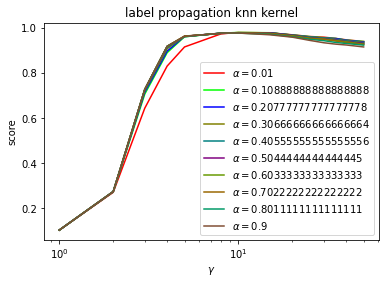

In [0]:
def test_labelSpreading_knn(*data):
  X,y, unlabled_indices = data
  y_train = np.copy(y)
  y_train[unlabled_indices]=-1

  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  alphas = np.linspace(.01,0.9,num=10,endpoint=True)
  Ks = [1,2,3,4,5,8,10,15,20,25,30,35,40,50]
  colors = ((1,0,0),(0,1,0), (0,0,1), (.5,.5,0),(0,.5,.5),(.5,0,.5),(.4,.6,0),(.6,.4,0),(0,.6,.4),(.5,.3,.2),)

  for alpha, color in zip(alphas,colors):
    scores = []
    for K in Ks:
      clf = LabelSpreading(max_iter=100, n_neighbors = K, alpha = alpha, kernel='knn')
      clf.fit(X,y_train)
      scores.append(clf.score(X[unlabled_indices],y[unlabled_indices]))
    ax.plot(Ks,scores,label=r"$\alpha=%s$"%alpha, color=color)

  ax.set_xlabel(r"$\gamma$")
  ax.set_ylabel("score")
  ax.set_xscale('log')
  ax.legend(loc='best')
  ax.set_title('label propagation knn kernel')
  plt.show()

data=load_data()
test_labelSpreading_knn(*data)
# when k increases, the prediction is getting flatten and down
# when k is big, the change of alpha does not impact so much, but the smaller alphas has better performance